In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pmdarima as pm
import math
import os
import warnings
warnings.filterwarnings('ignore')

# 1. Data Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sales_pipeline_df=pd.read_csv('/content/drive/MyDrive/CRM/sales_pipeline.csv')

In [ ]:
account_df=pd.read_csv('/content/drive/MyDrive/CRM/accounts.csv')

In [ ]:
sales_pipeline_df.isnull().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [ ]:
sales_pipeline_df.describe()

,close_value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


In [ ]:
sales_pipeline_df.dtypes

opportunity_id     object
sales_agent        object
product            object
account            object
deal_stage         object
engage_date        object
close_date         object
close_value       float64
dtype: object

In [ ]:
sales_pipeline_df['engage_date'] = pd.to_datetime(sales_pipeline_df['engage_date'])
sales_pipeline_df['close_date'] = pd.to_datetime(sales_pipeline_df['close_date'])

In [ ]:
account_df.dtypes

account              object
sector               object
year_established      int64
revenue             float64
employees             int64
office_location      object
subsidiary_of        object
dtype: object

In [ ]:
sale_df = pd.merge(sales_pipeline_df, account_df, on='account', how='left')

In [ ]:
sale_df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,retail,2001.0,718.62,2448.0,United States,NaN
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,medical,2002.0,3178.24,4540.0,United States,NaN
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,retail,2001.0,718.62,2448.0,United States,NaN
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,services,1982.0,792.46,1299.0,United States,NaN


In [ ]:
sale_df.isnull().sum()

opportunity_id         0
sales_agent            0
product                0
account             1425
deal_stage             0
engage_date          500
close_date          2089
close_value         2089
sector              1425
year_established    1425
revenue             1425
employees           1425
office_location     1425
subsidiary_of       7508
dtype: int64

In [ ]:
sale_df.shape

(8800, 14)

In [ ]:
count_id_per_account=sale_df.groupby('account')['opportunity_id'].count()

In [ ]:
sales_pipeline_df=sales_pipeline_df[sales_pipeline_df['account'].notnull()]

In [ ]:
sales_pipeline_df.isnull().sum()

opportunity_id      0
sales_agent         0
product             0
account             0
deal_stage          0
engage_date       163
close_date        664
close_value       664
dtype: int64

In [ ]:
sales_pipeline_df=sales_pipeline_df[sales_pipeline_df['close_date'].notnull()]

In [ ]:
sales_pipeline_df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0


In [ ]:
sales_pipeline_df.duplicated().sum()

0

In [ ]:
categorical_columns=[key for key, value in sale_df.dtypes.items()  if value=='O']
categorical_columns
for column in categorical_columns:
    print(sale_df[column].value_counts())

opportunity_id
1C1I7A6R    1
27REMGYU    1
HMWIP0F2    1
WAPSW48Y    1
J6TNURHV    1
           ..
S2D060YF    1
SUYF0EN7    1
51T70SQX    1
4T9CQH5J    1
8I5ONXJX    1
Name: count, Length: 8800, dtype: int64
sales_agent
Darcel Schlecht       747
Vicki Laflamme        451
Anna Snelling         448
Kary Hendrixson       438
Kami Bicknell         362
Versie Hillebrand     361
Zane Levy             349
Cassey Cress          346
Jonathan Berthelot    345
Gladys Colclough      317
Lajuana Vencill       311
Corliss Cosme         310
Markita Hansen        306
Maureen Marcano       285
Marty Freudenburg     281
Donn Cantrell         275
James Ascencio        267
Violet Mclelland      261
Moses Frase           260
Daniell Hammack       259
Niesha Huffines       239
Reed Clapper          237
Boris Faz             210
Cecily Lampkin        203
Hayden Neloms         202
Elease Gluck          177
Rosie Papadopoulos    160
Rosalina Dieter       160
Garret Kinder         123
Wilburn Farren        110

In [ ]:
sales_pipeline_df['deal_duration_days'] = (sales_pipeline_df['close_date'] - sales_pipeline_df['engage_date']).dt.days

In [ ]:
sales_pipeline_df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,deal_duration_days
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,132
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,137
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,133
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,135
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,128
...,...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0,2
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0,6
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0,3
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0,3


In [ ]:
sale_df.to_csv('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/sale_df.csv')

In [ ]:
# Define a function to calculate metrics for each account
datemax=sales_pipeline_df['close_date'].max()
def calculate_metrics(data):
    max_date = data['close_date'].max()
    # Aggregate main metrics
    metrics = data.groupby('account').agg({
        'close_date': lambda x: (max_date - x.max()).days + 1 if pd.notnull(x.max()) else None,  # Recency
        'opportunity_id': 'count',  # Frequency
        'close_value': 'sum',  # Monetary
        'product': lambda x: x.nunique(),  # Number of Products Won
        'deal_duration_days': 'mean',
    }).reset_index()


    won_deals = data[data['deal_stage'] == 'Won'].groupby('account').size().reset_index(name='won_deals')
    lost_deals = data[data['deal_stage'] == 'Lost'].groupby('account').size().reset_index(name='lost_deals')


    metrics = metrics.merge(won_deals, on='account', how='left').merge(lost_deals, on='account', how='left')


    metrics['won_deals'] = metrics['won_deals'].fillna(0).astype(int)
    metrics['lost_deals'] = metrics['lost_deals'].fillna(0).astype(int)

    won_revenue_per_product = data[data['deal_stage'] == 'Won'].groupby(['account', 'product'])['close_value'].sum().unstack().fillna(0)
    won_revenue_per_product.columns = [f'won_revenue_{col}' for col in won_revenue_per_product.columns]

    metrics = metrics.merge(won_revenue_per_product, on='account', how='left').fillna(0)

    return metrics

# Calculate the metrics
account_metrics = calculate_metrics(sales_pipeline_df)
account_metrics

,account,close_date,opportunity_id,close_value,product,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special
0,Acme Corporation,5,58,101744.0,6,52.362069,34,24,0.0,2268.0,7783.0,39585.0,34672.0,17211.0,225.0
1,Betasoloin,4,54,97036.0,6,49.388889,34,20,0.0,3878.0,5255.0,21599.0,43243.0,22960.0,101.0
2,Betatech,3,86,107408.0,6,41.790698,53,33,0.0,6579.0,6590.0,37725.0,27921.0,27820.0,773.0
3,Bioholding,2,85,90991.0,6,48.000000,50,35,0.0,6567.0,6580.0,38148.0,24999.0,13786.0,911.0
4,Bioplex,16,46,67393.0,6,41.673913,31,15,0.0,2801.0,4150.0,23111.0,24905.0,11934.0,492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Zencorporation,14,48,86690.0,6,44.395833,33,15,0.0,5019.0,3259.0,21132.0,50454.0,6554.0,272.0
81,Zoomit,4,46,76684.0,7,67.043478,33,13,25897.0,5107.0,6176.0,10196.0,14510.0,14357.0,441.0
82,Zotware,2,70,138339.0,6,45.685714,47,23,0.0,3693.0,8705.0,40635.0,54869.0,30216.0,221.0
83,Zumgoity,5,57,78237.0,6,46.543860,36,21,0.0,3478.0,10792.0,15723.0,24201.0,23773.0,270.0


In [ ]:
account_metrics['product'].mean()

6.176470588235294

In [ ]:
account_metrics.columns=['account', 'recency', 'frequency', 'monetary', 'count_product_won',
       'deal_duration_days', 'won_deals', 'lost_deals', 'won_revenue_GTK 500',
       'won_revenue_GTX Basic', 'won_revenue_GTX Plus Basic',
       'won_revenue_GTX Plus Pro', 'won_revenue_GTXPro',
       'won_revenue_MG Advanced', 'won_revenue_MG Special']

In [ ]:
account_metrics

,account,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special
0,Acme Corporation,5,58,101744.0,6,52.362069,34,24,0.0,2268.0,7783.0,39585.0,34672.0,17211.0,225.0
1,Betasoloin,4,54,97036.0,6,49.388889,34,20,0.0,3878.0,5255.0,21599.0,43243.0,22960.0,101.0
2,Betatech,3,86,107408.0,6,41.790698,53,33,0.0,6579.0,6590.0,37725.0,27921.0,27820.0,773.0
3,Bioholding,2,85,90991.0,6,48.000000,50,35,0.0,6567.0,6580.0,38148.0,24999.0,13786.0,911.0
4,Bioplex,16,46,67393.0,6,41.673913,31,15,0.0,2801.0,4150.0,23111.0,24905.0,11934.0,492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Zencorporation,14,48,86690.0,6,44.395833,33,15,0.0,5019.0,3259.0,21132.0,50454.0,6554.0,272.0
81,Zoomit,4,46,76684.0,7,67.043478,33,13,25897.0,5107.0,6176.0,10196.0,14510.0,14357.0,441.0
82,Zotware,2,70,138339.0,6,45.685714,47,23,0.0,3693.0,8705.0,40635.0,54869.0,30216.0,221.0
83,Zumgoity,5,57,78237.0,6,46.543860,36,21,0.0,3478.0,10792.0,15723.0,24201.0,23773.0,270.0


In [ ]:
account_metrics['account']=account_metrics['account'].str.strip()
account_df['account']=account_df['account'].str.strip()

In [ ]:
segment_df=pd.merge(account_df, account_metrics, on='account', how='left')

In [ ]:
segment_df.drop(columns=['subsidiary_of'])

,account,sector,year_established,revenue,employees,office_location,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,5,58,101744.0,6,52.362069,34,24,0.0,2268.0,7783.0,39585.0,34672.0,17211.0,225.0
1,Betasoloin,medical,1999,251.41,495,United States,4,54,97036.0,6,49.388889,34,20,0.0,3878.0,5255.0,21599.0,43243.0,22960.0,101.0
2,Betatech,medical,1986,647.18,1185,Kenya,3,86,107408.0,6,41.790698,53,33,0.0,6579.0,6590.0,37725.0,27921.0,27820.0,773.0
3,Bioholding,medical,2012,587.34,1356,Philipines,2,85,90991.0,6,48.000000,50,35,0.0,6567.0,6580.0,38148.0,24999.0,13786.0,911.0
4,Bioplex,medical,1991,326.82,1016,United States,16,46,67393.0,6,41.673913,31,15,0.0,2801.0,4150.0,23111.0,24905.0,11934.0,492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,2,52,55616.0,6,54.250000,34,18,0.0,4178.0,12156.0,24792.0,4545.0,9642.0,303.0
81,Zencorporation,technolgy,2011,40.79,142,China,14,48,86690.0,6,44.395833,33,15,0.0,5019.0,3259.0,21132.0,50454.0,6554.0,272.0
82,Zoomit,entertainment,1992,324.19,978,United States,4,46,76684.0,7,67.043478,33,13,25897.0,5107.0,6176.0,10196.0,14510.0,14357.0,441.0
83,Zotware,software,1979,4478.47,13809,United States,2,70,138339.0,6,45.685714,47,23,0.0,3693.0,8705.0,40635.0,54869.0,30216.0,221.0


In [ ]:
segment_df.to_csv('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/segment_df.csv')

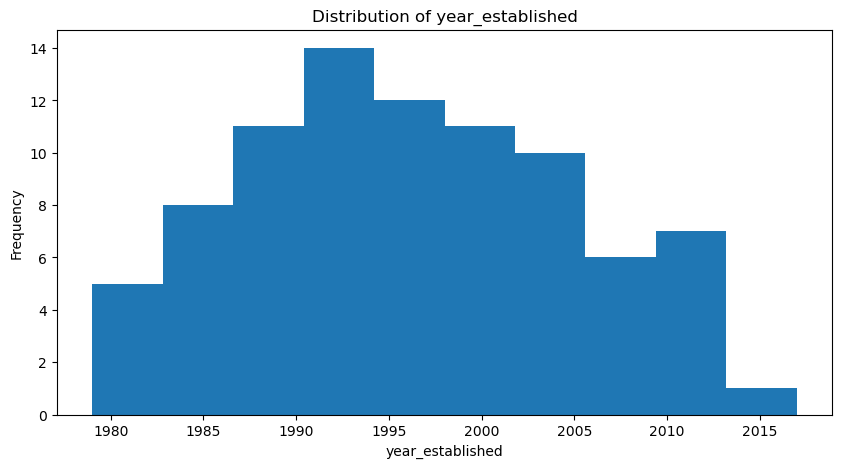

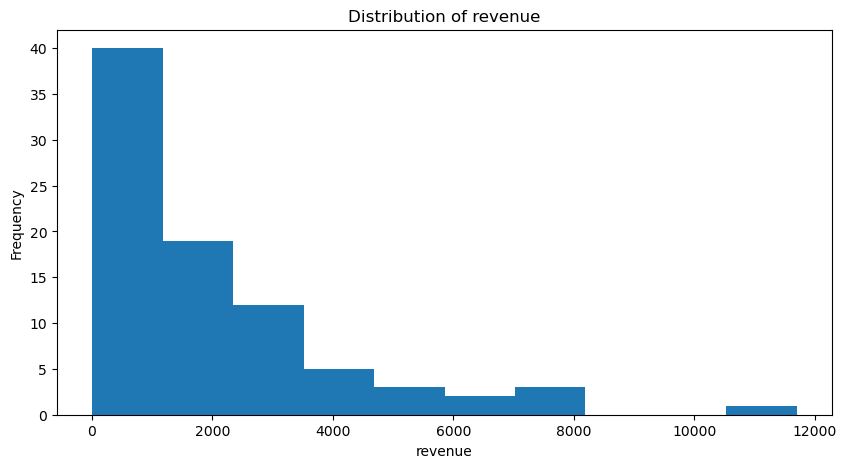

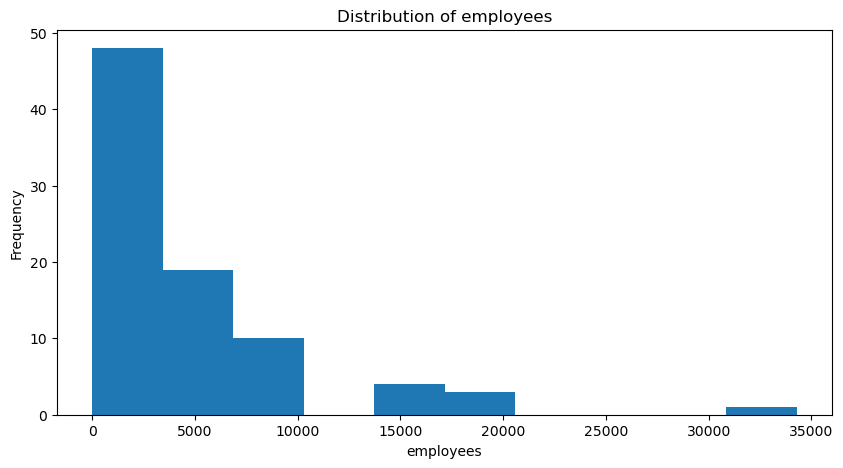

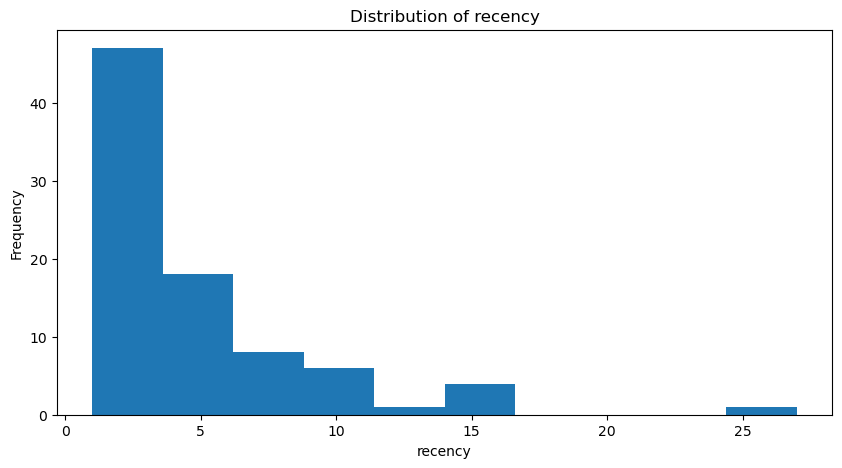

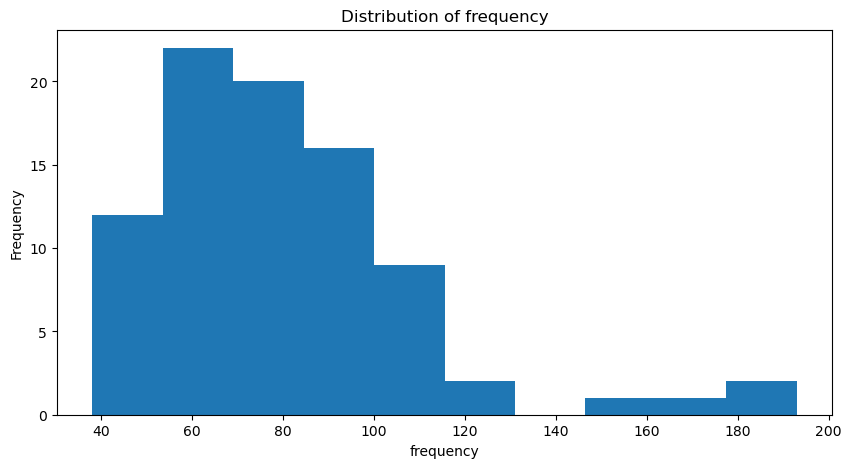

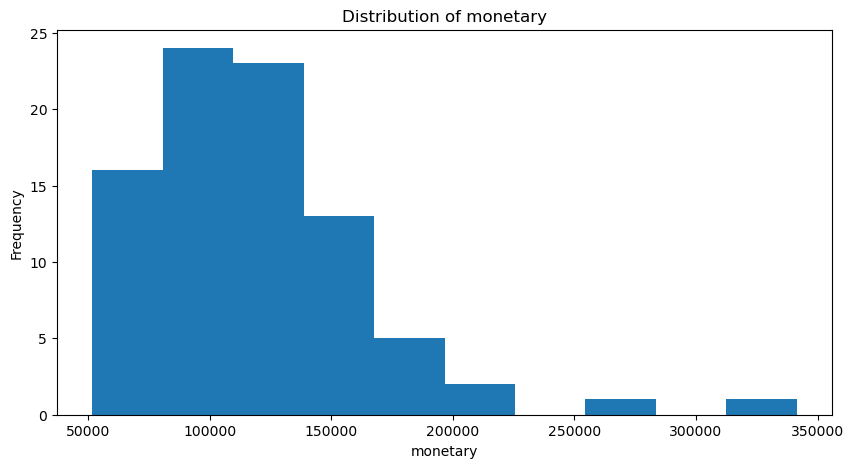

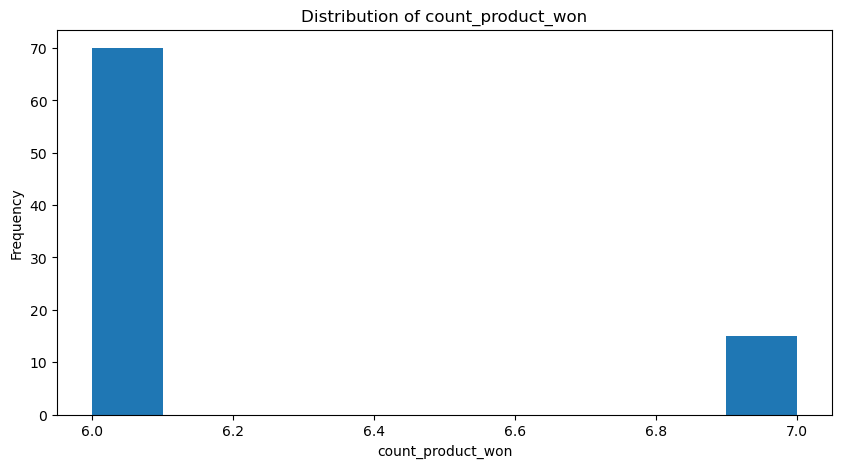

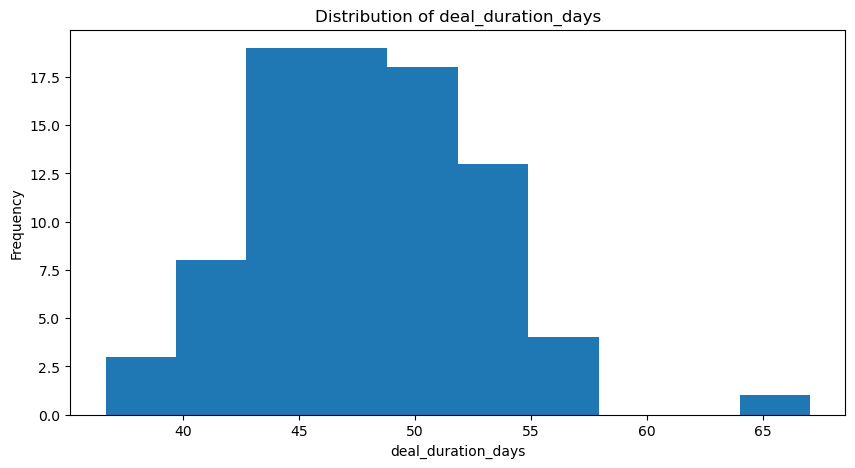

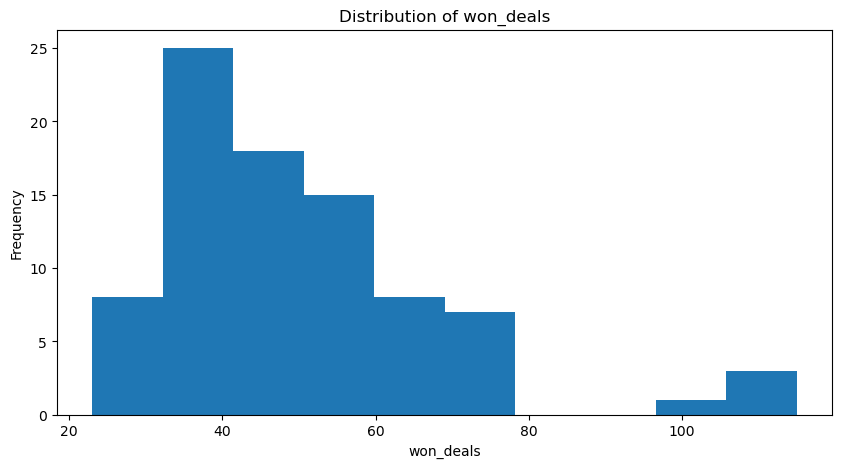

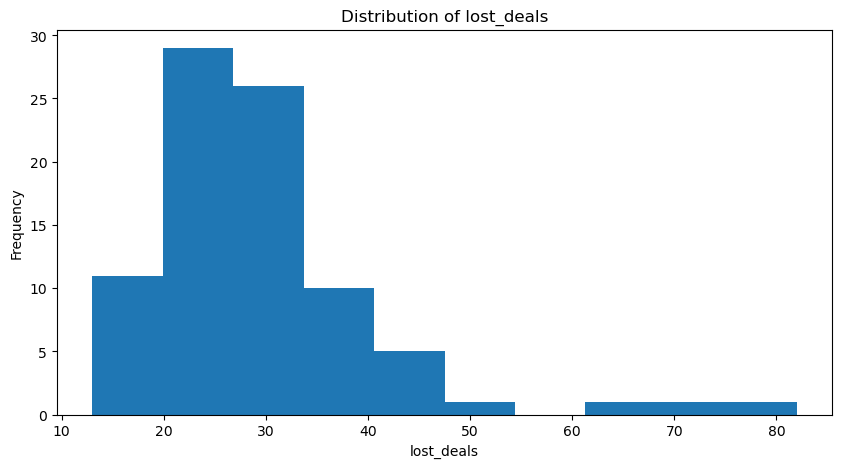

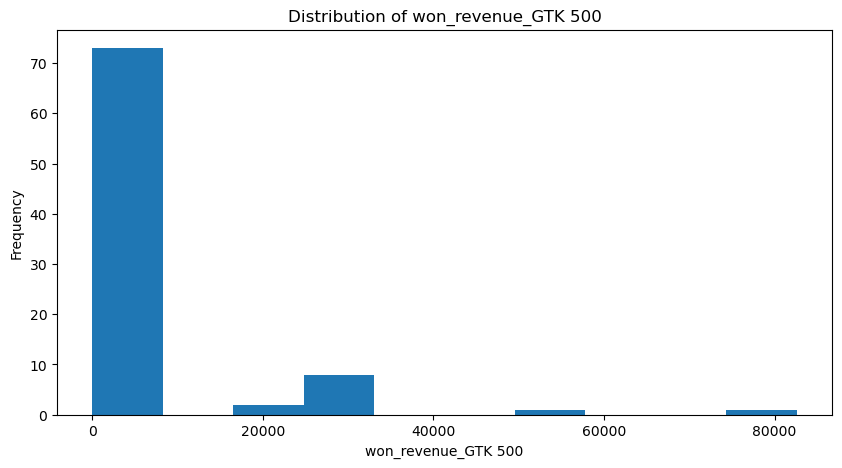

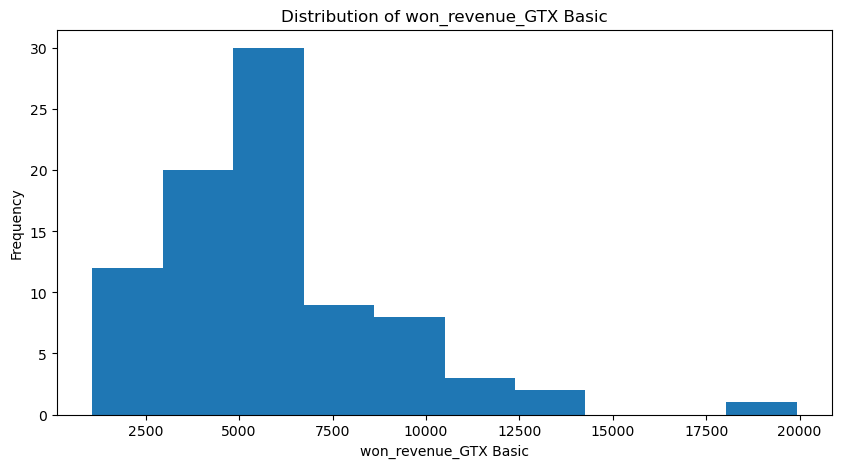

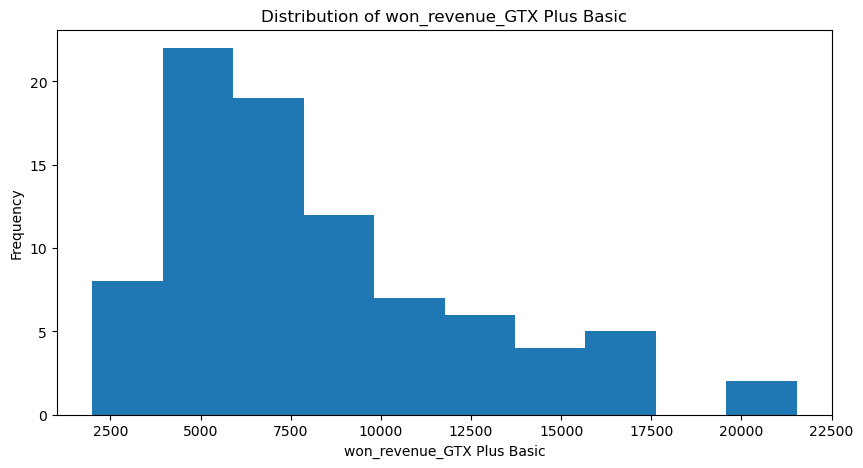

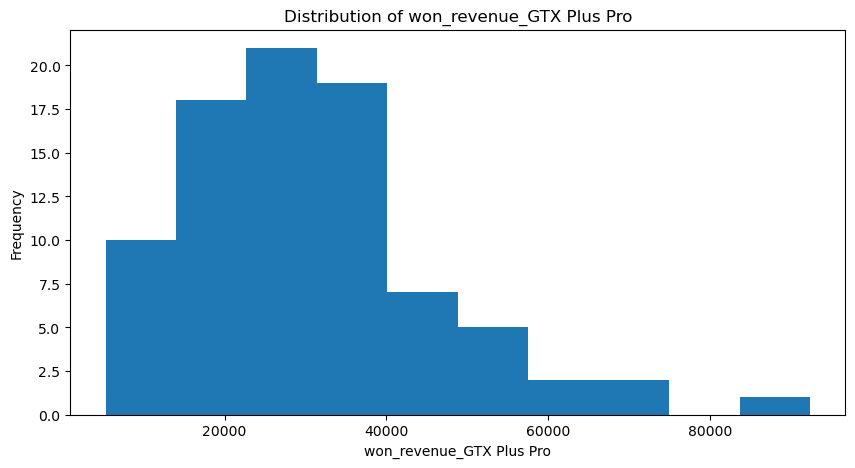

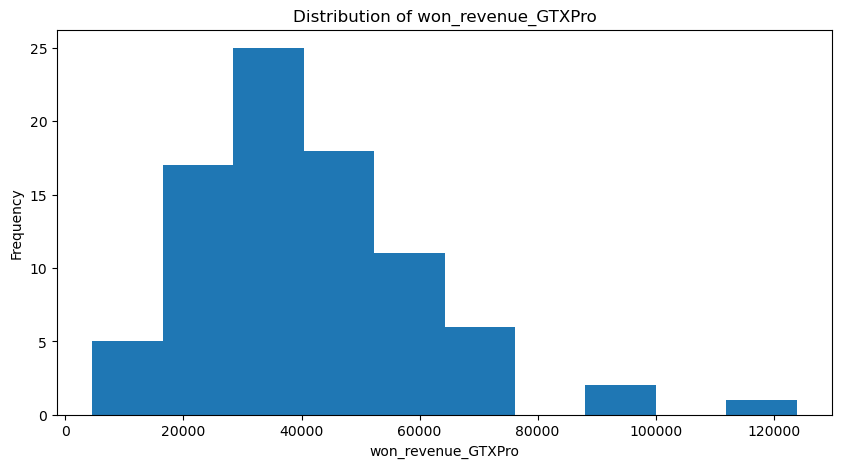

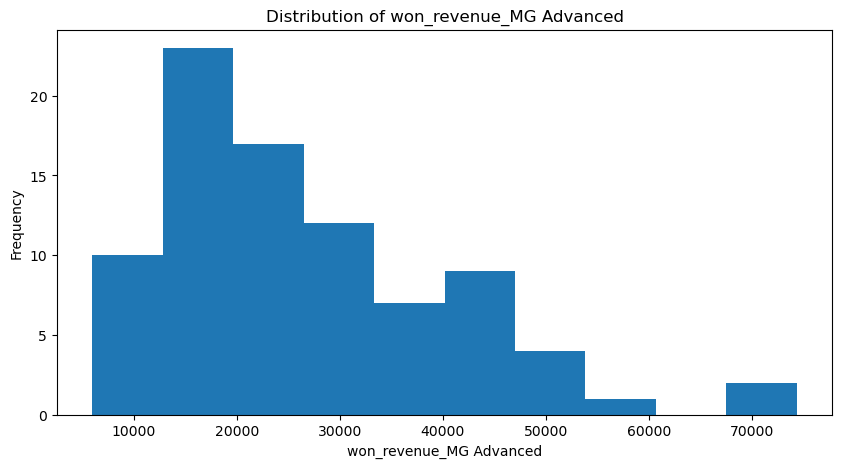

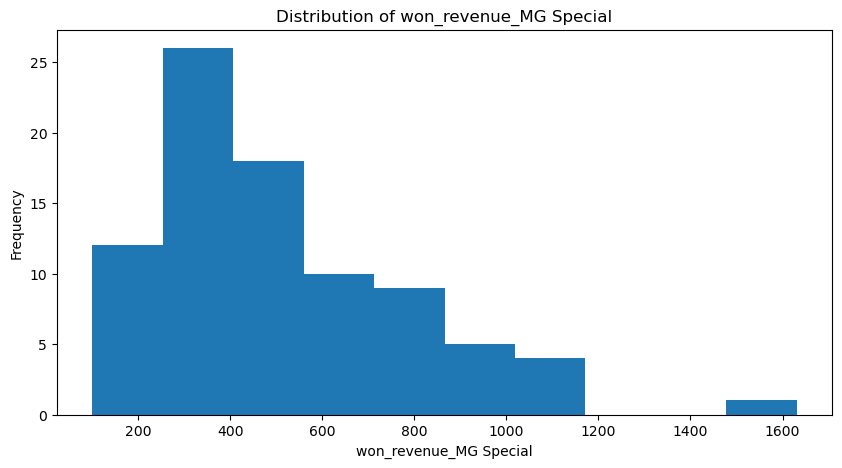

In [ ]:
numeric_columns = segment_df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(segment_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
ds=segment_df.select_dtypes(include=['int64', 'float64'])

In [ ]:
ds

,year_established,revenue,employees,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special
0,1996,1100.04,2822,5,58,101744.0,6,52.362069,34,24,0.0,2268.0,7783.0,39585.0,34672.0,17211.0,225.0
1,1999,251.41,495,4,54,97036.0,6,49.388889,34,20,0.0,3878.0,5255.0,21599.0,43243.0,22960.0,101.0
2,1986,647.18,1185,3,86,107408.0,6,41.790698,53,33,0.0,6579.0,6590.0,37725.0,27921.0,27820.0,773.0
3,2012,587.34,1356,2,85,90991.0,6,48.000000,50,35,0.0,6567.0,6580.0,38148.0,24999.0,13786.0,911.0
4,1991,326.82,1016,16,46,67393.0,6,41.673913,31,15,0.0,2801.0,4150.0,23111.0,24905.0,11934.0,492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2010,71.12,144,2,52,55616.0,6,54.250000,34,18,0.0,4178.0,12156.0,24792.0,4545.0,9642.0,303.0
81,2011,40.79,142,14,48,86690.0,6,44.395833,33,15,0.0,5019.0,3259.0,21132.0,50454.0,6554.0,272.0
82,1992,324.19,978,4,46,76684.0,7,67.043478,33,13,25897.0,5107.0,6176.0,10196.0,14510.0,14357.0,441.0
83,1979,4478.47,13809,2,70,138339.0,6,45.685714,47,23,0.0,3693.0,8705.0,40635.0,54869.0,30216.0,221.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

In [ ]:
scaled_ds

,year_established,revenue,employees,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special
0,-0.012014,-0.414799,-0.323629,0.114019,-0.719758,-0.345249,-0.462910,0.921593,-0.860537,-0.433987,-0.355464,-1.186794,-0.119431,0.534839,-0.345085,-0.642427,-1.030600
1,0.328387,-0.808286,-0.733177,-0.111368,-0.857162,-0.447041,-0.462910,0.306131,-0.860537,-0.774762,-0.355464,-0.656870,-0.706421,-0.577522,0.101100,-0.225769,-1.471396
2,-1.146686,-0.624778,-0.611738,-0.336755,0.242075,-0.222787,-0.462910,-1.266730,0.170448,0.332757,-0.355464,0.232152,-0.396440,0.419806,-0.696526,0.126458,0.917432
3,1.803460,-0.652524,-0.581643,-0.562142,0.207723,-0.577740,-0.462910,0.018624,0.007661,0.503144,-0.355464,0.228202,-0.398762,0.445967,-0.848638,-0.890653,1.407995
4,-0.579350,-0.773320,-0.641482,2.593280,-1.131971,-1.087955,-0.462910,-1.290905,-1.023325,-1.200731,-0.355464,-1.011359,-0.962997,-0.484011,-0.853531,-1.024876,-0.081468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1.576526,-0.891881,-0.794952,-0.562142,-0.925864,-1.342586,-0.462910,1.312403,-0.860537,-0.945150,-0.355464,-0.558126,0.895961,-0.380048,-1.913423,-1.190989,-0.753326
81,1.689993,-0.905944,-0.795304,2.142505,-1.063269,-0.670733,-0.462910,-0.727455,-0.914800,-1.200731,-0.355464,-0.281315,-1.169884,-0.606404,0.476487,-1.414791,-0.863525
82,-0.465883,-0.774539,-0.648170,-0.111368,-1.131971,-0.887073,2.160247,3.960712,-0.914800,-1.371119,1.597705,-0.252350,-0.492569,-1.282751,-1.394669,-0.849270,-0.262763
83,-1.940956,1.151688,1.610061,-0.562142,-0.307544,0.445974,-0.462910,-0.460443,-0.155127,-0.519181,-0.355464,-0.717762,0.094654,0.599778,0.706321,0.300108,-1.044820


# 2. Segmentation

## 2.1.PCA

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,85.0,-3.395976e-17,2.822640,-3.736644,-2.064137,-0.214208,1.069658,12.560477
col2,85.0,-1.828603e-17,1.528800,-4.671684,-0.896447,-0.046320,0.574771,5.473048
col3,85.0,-5.257233e-17,1.207834,-2.951979,-0.704320,-0.125864,0.655121,4.325617


In [ ]:
PCA_ds

,col1,col2,col3
0,-1.735689,0.259025,-0.119721
1,-2.262165,0.271744,-0.251067
2,-0.041120,-1.072593,-0.368059
3,-0.749414,-2.064925,0.647161
4,-3.287348,0.598333,-1.650742
...,...,...,...
80,-2.970363,-0.763221,1.686462
81,-3.160646,0.257004,-1.603512
82,-2.410933,2.078657,4.325617
83,0.838327,1.366334,-1.594752


## 2.2. KMeans

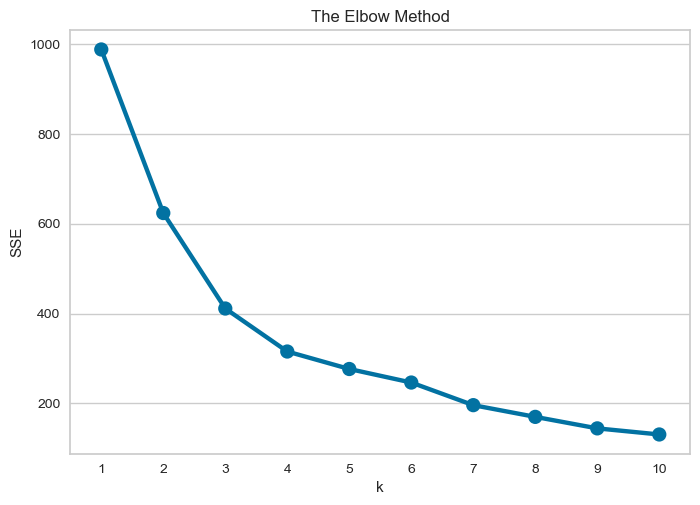

In [ ]:
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(PCA_ds)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 123)
    kmeans.fit(normalised_df_rfm)
    # Extract cluster labels
    cluster_labels = kmeans.labels_
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    # Initialise TSNE
    model = TSNE(random_state=123)
    transformed = model.fit_transform(df_new)
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

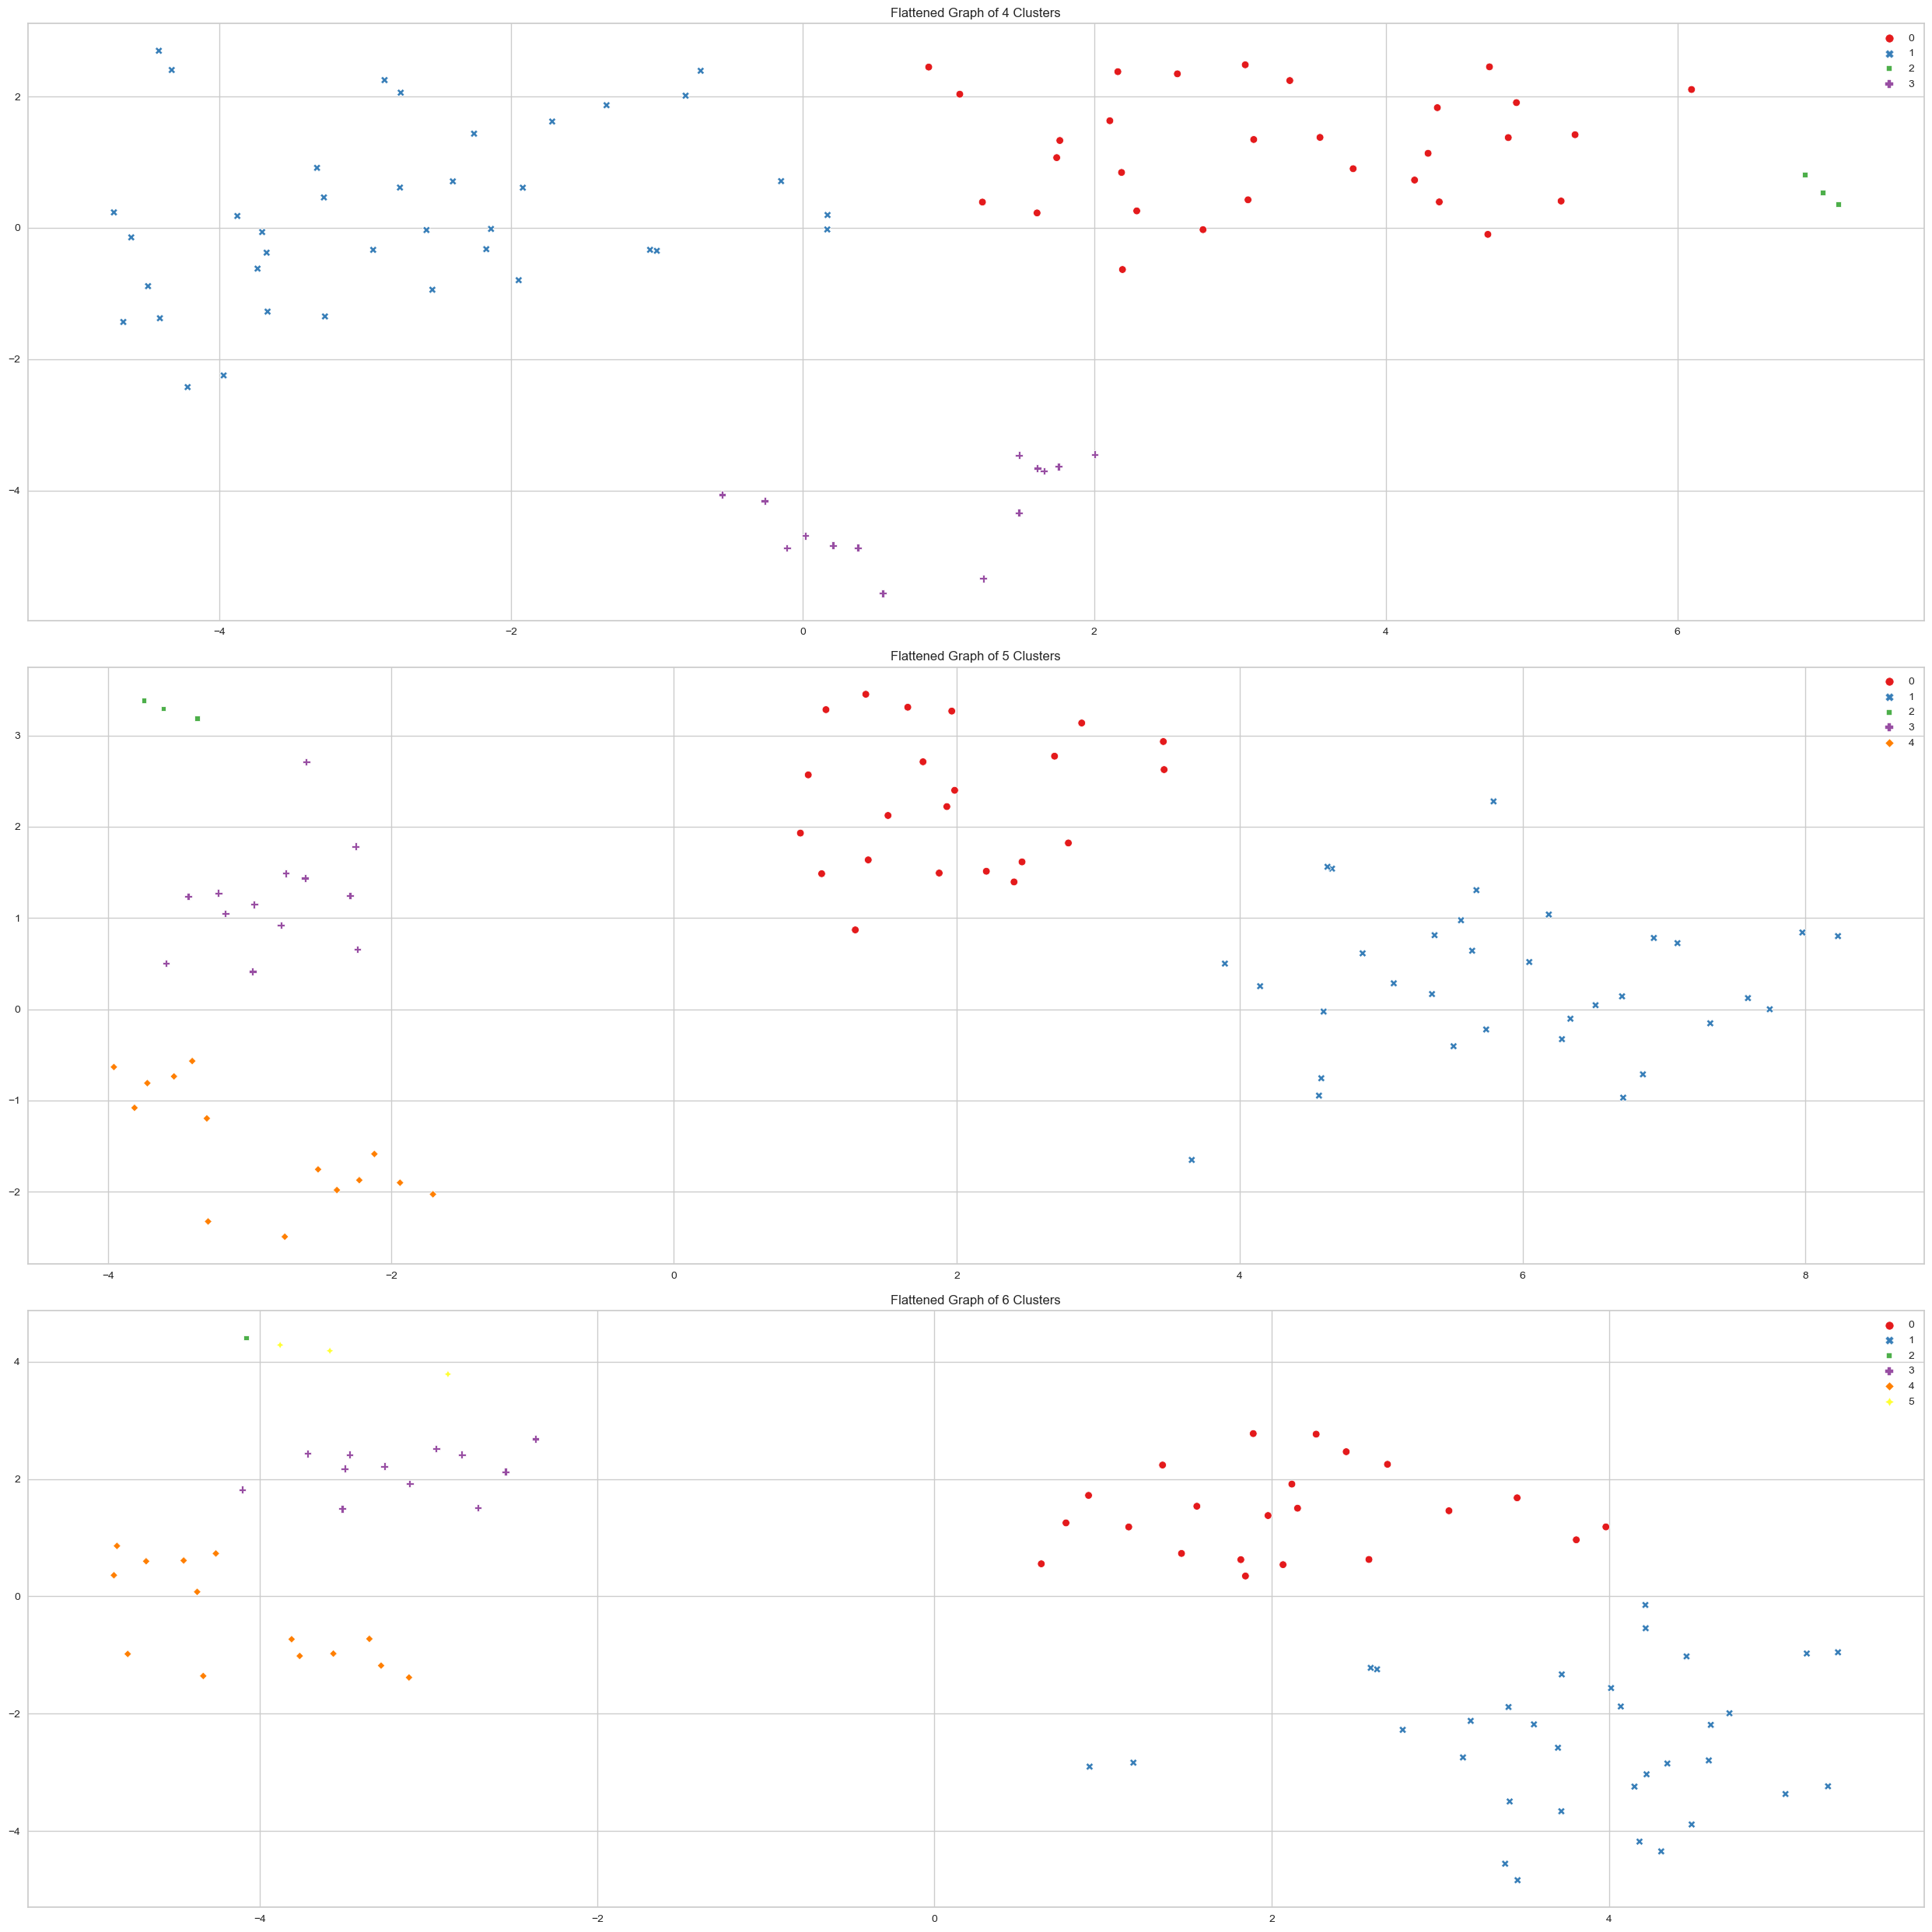

In [ ]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(PCA_ds, 4, PCA_ds[['col1', 'col2', 'col3']])
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(PCA_ds, 5, PCA_ds[['col1', 'col2', 'col3']])
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(PCA_ds, 6, PCA_ds[['col1', 'col2', 'col3']])
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(123)
#Initiating the Agglomerative Clustering model
KM = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM

In [ ]:
PCA_ds

,col1,col2,col3,Clusters
0,-1.735689,0.259025,-0.119721,1
1,-2.262165,0.271744,-0.251067,1
2,-0.041120,-1.072593,-0.368059,0
3,-0.749414,-2.064925,0.647161,0
4,-3.287348,0.598333,-1.650742,1
...,...,...,...,...
80,-2.970363,-0.763221,1.686462,1
81,-3.160646,0.257004,-1.603512,1
82,-2.410933,2.078657,4.325617,1
83,0.838327,1.366334,-1.594752,3


In [ ]:
ds['clusters'] = KM.labels_

In [ ]:
ds

,year_established,revenue,employees,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special,clusters
0,1996,1100.04,2822,5,58,101744.0,6,52.362069,34,24,0.0,2268.0,7783.0,39585.0,34672.0,17211.0,225.0,1
1,1999,251.41,495,4,54,97036.0,6,49.388889,34,20,0.0,3878.0,5255.0,21599.0,43243.0,22960.0,101.0,1
2,1986,647.18,1185,3,86,107408.0,6,41.790698,53,33,0.0,6579.0,6590.0,37725.0,27921.0,27820.0,773.0,0
3,2012,587.34,1356,2,85,90991.0,6,48.000000,50,35,0.0,6567.0,6580.0,38148.0,24999.0,13786.0,911.0,0
4,1991,326.82,1016,16,46,67393.0,6,41.673913,31,15,0.0,2801.0,4150.0,23111.0,24905.0,11934.0,492.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2010,71.12,144,2,52,55616.0,6,54.250000,34,18,0.0,4178.0,12156.0,24792.0,4545.0,9642.0,303.0,1
81,2011,40.79,142,14,48,86690.0,6,44.395833,33,15,0.0,5019.0,3259.0,21132.0,50454.0,6554.0,272.0,1
82,1992,324.19,978,4,46,76684.0,7,67.043478,33,13,25897.0,5107.0,6176.0,10196.0,14510.0,14357.0,441.0,1
83,1979,4478.47,13809,2,70,138339.0,6,45.685714,47,23,0.0,3693.0,8705.0,40635.0,54869.0,30216.0,221.0,3


In [ ]:
ds['clusters'].value_counts()

clusters
1    38
0    30
3    14
2     3
Name: count, dtype: int64

In [ ]:
mean_Kmeans=ds.groupby('clusters').mean()
mean_Kmeans

,year_established,revenue,employees,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special
clusters,,,,,,,,,,,,,,,,,
0,1995.600000,2203.901000,4541.633333,3.033333,96.433333,135529.800000,6.066667,48.626015,61.566667,34.866667,0.000000,6968.400000,10467.033333,37799.233333,47348.000000,32230.600000,716.533333
1,1998.947368,665.111842,1577.473684,5.289474,57.789474,83777.157895,6.052632,47.588383,36.263158,21.526316,1478.552632,4028.842105,5797.710526,22399.657895,32530.157895,17125.184211,417.052632
2,1986.333333,9192.263333,21514.333333,1.000000,183.666667,268552.333333,6.666667,46.256494,111.333333,72.333333,8597.000000,15699.333333,19526.000000,65632.666667,94656.000000,63683.333333,758.000000
3,1991.571429,3612.552143,9673.857143,6.214286,76.500000,139317.928571,6.642857,47.603141,48.500000,28.000000,22759.714286,6429.785714,8026.642857,31970.642857,40716.000000,29118.714286,296.428571


In [ ]:
mean_Kmeans.to_csv('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/mean_Kmeans.csv')

<Axes: xlabel='revenue', ylabel='monetary'>

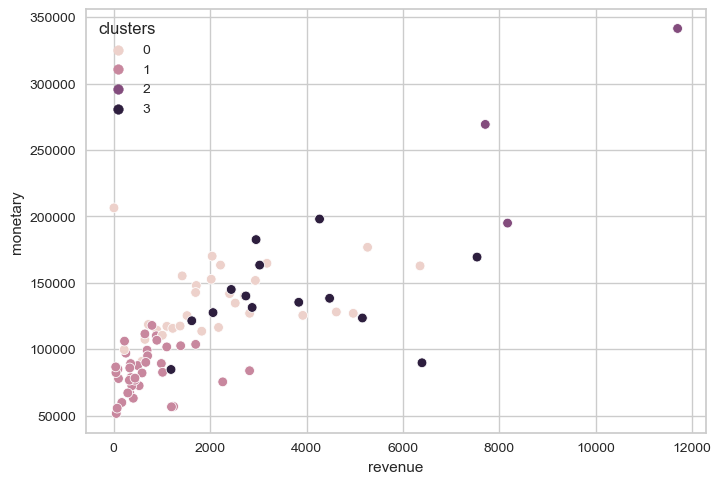

In [ ]:
sns.scatterplot(data=ds, x="revenue", y="monetary", hue="clusters")

In [ ]:
segment=segment_df.copy()

In [ ]:
segment['clusters'] = KM.labels_

In [ ]:
segment.dtypes

account                        object
sector                         object
year_established                int64
revenue                       float64
employees                       int64
office_location                object
subsidiary_of                  object
recency                         int64
frequency                       int64
monetary                      float64
count_product_won               int64
deal_duration_days            float64
won_deals                       int64
lost_deals                      int64
won_revenue_GTK 500           float64
won_revenue_GTX Basic         float64
won_revenue_GTX Plus Basic    float64
won_revenue_GTX Plus Pro      float64
won_revenue_GTXPro            float64
won_revenue_MG Advanced       float64
won_revenue_MG Special        float64
clusters                        int32
dtype: object

In [ ]:
segment.to_csv('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/segment.csv')

In [ ]:
segment=segment.merge(count_id_per_account, on='account', how='left')

In [ ]:
segment

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,recency,frequency,monetary,...,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special,clusters,opportunity_id
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,5,58,101744.0,...,24,0.0,2268.0,7783.0,39585.0,34672.0,17211.0,225.0,1,68
1,Betasoloin,medical,1999,251.41,495,United States,NaN,4,54,97036.0,...,20,0.0,3878.0,5255.0,21599.0,43243.0,22960.0,101.0,1,68
2,Betatech,medical,1986,647.18,1185,Kenya,NaN,3,86,107408.0,...,33,0.0,6579.0,6590.0,37725.0,27921.0,27820.0,773.0,0,92
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN,2,85,90991.0,...,35,0.0,6567.0,6580.0,38148.0,24999.0,13786.0,911.0,0,94
4,Bioplex,medical,1991,326.82,1016,United States,NaN,16,46,67393.0,...,15,0.0,2801.0,4150.0,23111.0,24905.0,11934.0,492.0,1,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,NaN,2,52,55616.0,...,18,0.0,4178.0,12156.0,24792.0,4545.0,9642.0,303.0,1,59
81,Zencorporation,technolgy,2011,40.79,142,China,NaN,14,48,86690.0,...,15,0.0,5019.0,3259.0,21132.0,50454.0,6554.0,272.0,1,58
82,Zoomit,entertainment,1992,324.19,978,United States,NaN,4,46,76684.0,...,13,25897.0,5107.0,6176.0,10196.0,14510.0,14357.0,441.0,1,58
83,Zotware,software,1979,4478.47,13809,United States,NaN,2,70,138339.0,...,23,0.0,3693.0,8705.0,40635.0,54869.0,30216.0,221.0,3,75


In [ ]:
segment['won_rate']=segment['won_deals']/segment['opportunity_id']

In [ ]:
segment['lost_rate']=segment['lost_deals']/segment['opportunity_id']

In [ ]:
segment[segment.select_dtypes(exclude=['object']).columns].groupby('clusters').mean()

,year_established,revenue,employees,recency,frequency,monetary,count_product_won,deal_duration_days,won_deals,lost_deals,won_revenue_GTK 500,won_revenue_GTX Basic,won_revenue_GTX Plus Basic,won_revenue_GTX Plus Pro,won_revenue_GTXPro,won_revenue_MG Advanced,won_revenue_MG Special,opportunity_id,won_rate,lost_rate
clusters,,,,,,,,,,,,,,,,,,,,
0,1995.600000,2203.901000,4541.633333,3.033333,96.433333,135529.800000,6.066667,48.626015,61.566667,34.866667,0.000000,6968.400000,10467.033333,37799.233333,47348.000000,32230.600000,716.533333,104.166667,0.590497,0.334890
1,1998.947368,665.111842,1577.473684,5.289474,57.789474,83777.157895,6.052632,47.588383,36.263158,21.526316,1478.552632,4028.842105,5797.710526,22399.657895,32530.157895,17125.184211,417.052632,65.789474,0.551110,0.325096
2,1986.333333,9192.263333,21514.333333,1.000000,183.666667,268552.333333,6.666667,46.256494,111.333333,72.333333,8597.000000,15699.333333,19526.000000,65632.666667,94656.000000,63683.333333,758.000000,191.333333,0.582825,0.377093
3,1991.571429,3612.552143,9673.857143,6.214286,76.500000,139317.928571,6.642857,47.603141,48.500000,28.000000,22759.714286,6429.785714,8026.642857,31970.642857,40716.000000,29118.714286,296.428571,84.000000,0.575727,0.335020


In [ ]:
segment.to_csv('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/segment.csv')

# 3. Classification model - XGBoost Classifer

In [ ]:
account_df['segment']=KM.labels_

In [ ]:
account_df

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,segment
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,1
1,Betasoloin,medical,1999,251.41,495,United States,NaN,1
2,Betatech,medical,1986,647.18,1185,Kenya,NaN,0
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN,0
4,Bioplex,medical,1991,326.82,1016,United States,NaN,1
...,...,...,...,...,...,...,...,...
80,Zathunicon,retail,2010,71.12,144,United States,NaN,1
81,Zencorporation,technolgy,2011,40.79,142,China,NaN,1
82,Zoomit,entertainment,1992,324.19,978,United States,NaN,1
83,Zotware,software,1979,4478.47,13809,United States,NaN,3


In [ ]:
sales_pipeline_df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,deal_duration_days
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,132
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,137
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,133
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,135
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,128
...,...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0,2
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0,6
8297,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0,3
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0,3


In [ ]:
sales_team_df=pd.read_csv('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/sales_teams.csv')

In [ ]:
sales_team_df

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central
5,Jonathan Berthelot,Melvin Marxen,Central
6,Marty Freudenburg,Melvin Marxen,Central
7,Gladys Colclough,Melvin Marxen,Central
8,Niesha Huffines,Melvin Marxen,Central
9,Darcel Schlecht,Melvin Marxen,Central


In [ ]:
data=sales_pipeline_df.merge(account_df, on='account', how='left')
data

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,deal_duration_days,sector,year_established,revenue,employees,office_location,subsidiary_of,segment
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,132,retail,2001,718.62,2448,United States,NaN,0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,137,medical,2002,3178.24,4540,United States,NaN,0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,133,retail,2001,718.62,2448,United States,NaN,0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,135,software,1998,2714.90,2641,United States,Acme Corporation,0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,128,services,1982,792.46,1299,United States,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0,2,technolgy,2005,1520.66,1806,United States,NaN,0
6707,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0,6,technolgy,1993,1242.32,3027,United States,Acme Corporation,1
6708,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0,3,technolgy,1997,8170.38,16499,Korea,NaN,2
6709,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0,3,marketing,1986,2403.58,8801,United States,NaN,0


In [ ]:
data=data.merge(sales_team_df, on='sales_agent', how='left')

In [ ]:
data

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,deal_duration_days,sector,year_established,revenue,employees,office_location,subsidiary_of,segment,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,132,retail,2001,718.62,2448,United States,NaN,0,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,137,medical,2002,3178.24,4540,United States,NaN,0,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,133,retail,2001,718.62,2448,United States,NaN,0,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,135,software,1998,2714.90,2641,United States,Acme Corporation,0,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,128,services,1982,792.46,1299,United States,NaN,1,Summer Sewald,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0,2,technolgy,2005,1520.66,1806,United States,NaN,0,Dustin Brinkmann,Central
6707,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0,6,technolgy,1993,1242.32,3027,United States,Acme Corporation,1,Cara Losch,East
6708,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0,3,technolgy,1997,8170.38,16499,Korea,NaN,2,Summer Sewald,West
6709,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0,3,marketing,1986,2403.58,8801,United States,NaN,0,Melvin Marxen,Central


In [ ]:
data.dtypes

opportunity_id                object
sales_agent                   object
product                       object
account                       object
deal_stage                    object
engage_date           datetime64[ns]
close_date            datetime64[ns]
close_value                  float64
deal_duration_days             int64
sector                        object
year_established               int64
revenue                      float64
employees                      int64
office_location               object
subsidiary_of                 object
segment                        int32
manager                       object
regional_office               object
dtype: object

In [ ]:
# Year
data['year_egnage'] = data['engage_date'].dt.year

# Month
data['monhth_egnage'] = data['engage_date'].dt.month

#quarter
data['quarter_egnage']=data['engage_date'].dt.quarter.map({1:"Q1", 2:"Q2", 3:"Q3", 4:"Q4"})

# Year
data['year_close'] = data['close_date'].dt.year

# Month
data['monhth_close'] = data['close_date'].dt.month

#quarter
data['quarter_close']=data['close_date'].dt.quarter.map({1:"Q1", 2:"Q2", 3:"Q3", 4:"Q4"})

In [ ]:
data

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,deal_duration_days,sector,...,subsidiary_of,segment,manager,regional_office,year_egnage,monhth_egnage,quarter_egnage,year_close,monhth_close,quarter_close
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,132,retail,...,NaN,0,Dustin Brinkmann,Central,2016,10,Q4,2017,3,Q1
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,137,medical,...,NaN,0,Melvin Marxen,Central,2016,10,Q4,2017,3,Q1
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,133,retail,...,NaN,0,Melvin Marxen,Central,2016,10,Q4,2017,3,Q1
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,135,software,...,Acme Corporation,0,Dustin Brinkmann,Central,2016,10,Q4,2017,3,Q1
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,128,services,...,NaN,1,Summer Sewald,West,2016,10,Q4,2017,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0,2,technolgy,...,NaN,0,Dustin Brinkmann,Central,2017,12,Q4,2017,12,Q4
6707,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0,6,technolgy,...,Acme Corporation,1,Cara Losch,East,2017,12,Q4,2017,12,Q4
6708,6WCNNK5J,Maureen Marcano,GTXPro,Hottechi,Won,2017-12-26,2017-12-29,4433.0,3,technolgy,...,NaN,2,Summer Sewald,West,2017,12,Q4,2017,12,Q4
6709,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0,3,marketing,...,NaN,0,Melvin Marxen,Central,2017,12,Q4,2017,12,Q4


In [ ]:
data.dtypes

opportunity_id                object
sales_agent                   object
product                       object
account                       object
deal_stage                    object
engage_date           datetime64[ns]
close_date            datetime64[ns]
close_value                  float64
deal_duration_days             int64
sector                        object
year_established               int64
revenue                      float64
employees                      int64
office_location               object
subsidiary_of                 object
segment                        int32
manager                       object
regional_office               object
year_egnage                    int32
monhth_egnage                  int32
quarter_egnage                object
year_close                     int32
monhth_close                   int32
quarter_close                 object
dtype: object

In [ ]:
data.columns

Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'engage_date', 'close_date', 'close_value', 'deal_duration_days',
       'sector', 'year_established', 'revenue', 'employees', 'office_location',
       'subsidiary_of', 'segment', 'manager', 'regional_office', 'year_egnage',
       'monhth_egnage', 'quarter_egnage', 'year_close', 'monhth_close',
       'quarter_close'],
      dtype='object')

In [ ]:
data['deal_stage']=data['deal_stage'].map({'Won':1, 'Lost':0})

In [ ]:
data=data.drop(['opportunity_id','engage_date','close_date','close_value', 'account','sales_agent'], axis=1)

In [ ]:
data.dtypes

product                object
deal_stage              int64
deal_duration_days      int64
sector                 object
year_established        int64
revenue               float64
employees               int64
office_location        object
subsidiary_of          object
segment                 int32
manager                object
regional_office        object
year_egnage             int32
monhth_egnage           int32
quarter_egnage         object
year_close              int32
monhth_close            int32
quarter_close          object
dtype: object

In [ ]:
df = pd.get_dummies(data = data, columns = ['product', 'sector', 'office_location','segment','manager','regional_office','subsidiary_of','quarter_egnage','quarter_close'], drop_first=True, dtype=int)

In [ ]:
df

,deal_stage,deal_duration_days,year_established,revenue,employees,year_egnage,monhth_egnage,year_close,monhth_close,product_GTX Basic,...,subsidiary_of_Inity,subsidiary_of_Massive Dynamic,subsidiary_of_Sonron,subsidiary_of_Warephase,quarter_egnage_Q2,quarter_egnage_Q3,quarter_egnage_Q4,quarter_close_Q2,quarter_close_Q3,quarter_close_Q4
0,1,132,2001,718.62,2448,2016,10,2017,3,0,...,0,0,0,0,0,0,1,0,0,0
1,1,137,2002,3178.24,4540,2016,10,2017,3,0,...,0,0,0,0,0,0,1,0,0,0
2,1,133,2001,718.62,2448,2016,10,2017,3,0,...,0,0,0,0,0,0,1,0,0,0
3,1,135,1998,2714.90,2641,2016,10,2017,3,1,...,0,0,0,0,0,0,1,0,0,0
4,1,128,1982,792.46,1299,2016,10,2017,3,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,1,2,2005,1520.66,1806,2017,12,2017,12,1,...,0,0,0,0,0,0,1,0,0,1
6707,1,6,1993,1242.32,3027,2017,12,2017,12,0,...,0,0,0,0,0,0,1,0,0,1
6708,1,3,1997,8170.38,16499,2017,12,2017,12,0,...,0,0,0,0,0,0,1,0,0,1
6709,1,3,1986,2403.58,8801,2017,12,2017,12,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
df.dtypes

deal_stage                         int64
deal_duration_days                 int64
year_established                   int64
revenue                          float64
employees                          int64
year_egnage                        int32
monhth_egnage                      int32
year_close                         int32
monhth_close                       int32
product_GTX Basic                  int64
product_GTX Plus Basic             int64
product_GTX Plus Pro               int64
product_GTXPro                     int64
product_MG Advanced                int64
product_MG Special                 int64
sector_entertainment               int64
sector_finance                     int64
sector_marketing                   int64
sector_medical                     int64
sector_retail                      int64
sector_services                    int64
sector_software                    int64
sector_technolgy                   int64
sector_telecommunications          int64
office_location_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
columns_selected=['deal_duration_days','year_established','revenue','employees','year_egnage','monhth_egnage','year_close','monhth_close']
columns_selected

['deal_duration_days',
 'year_established',
 'revenue',
 'employees',
 'year_egnage',
 'monhth_egnage',
 'year_close',
 'monhth_close']

In [ ]:
scaler = StandardScaler()

df[columns_selected] = scaler.fit_transform(df[columns_selected])

df.head()

,deal_stage,deal_duration_days,year_established,revenue,employees,year_egnage,monhth_egnage,year_close,monhth_close,product_GTX Basic,...,subsidiary_of_Inity,subsidiary_of_Massive Dynamic,subsidiary_of_Sonron,subsidiary_of_Warephase,quarter_egnage_Q2,quarter_egnage_Q3,quarter_egnage_Q4,quarter_close_Q2,quarter_close_Q3,quarter_close_Q4
0,1,2.046411,0.608935,-0.685628,-0.486773,-4.582933,1.167815,0.0,-1.583419,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2.168200,0.717747,0.250424,-0.183700,-4.582933,1.167815,0.0,-1.583419,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.070769,0.608935,-0.685628,-0.486773,-4.582933,1.167815,0.0,-1.583419,0,...,0,0,0,0,0,0,1,0,0,0
3,1,2.119485,0.282497,0.074092,-0.458813,-4.582933,1.167815,0.0,-1.583419,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1.948980,-1.458503,-0.657527,-0.653231,-4.582933,1.167815,0.0,-1.583419,1,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

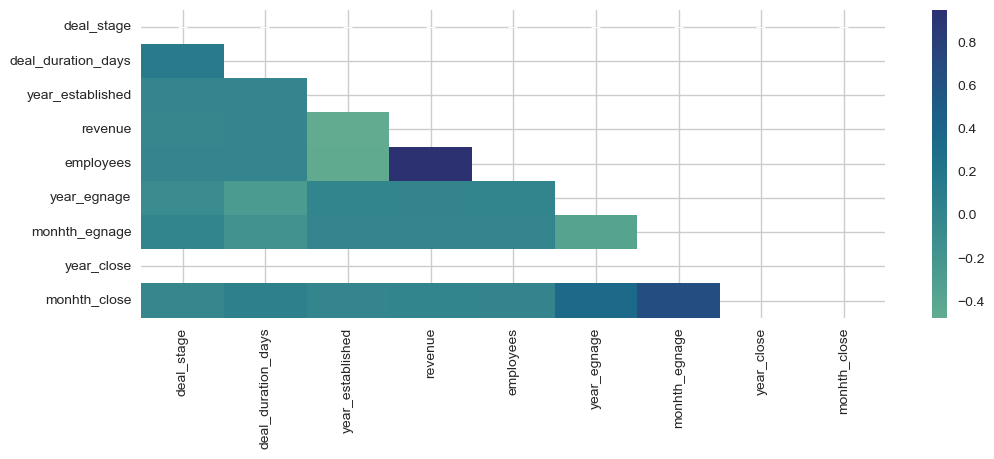

In [ ]:
columns_corr=['deal_stage', 'deal_duration_days','year_established','revenue','employees','year_egnage','monhth_egnage','year_close','monhth_close']
sns.set_style('whitegrid')
plt.subplots(figsize=(12, 4))

# Create a mask for the upper triangle
mask = np.zeros_like(df[columns_corr].corr())
mask[np.triu_indices_from(mask)] = True

# Define a custom color map that intensifies with the absolute value
cmap=sns.color_palette("crest", as_cmap=True)

# Plot the heatmap
sns.heatmap(df[columns_corr].corr(),
            cmap=cmap, mask=mask, annot=True, center=0)


In [ ]:
X = df.drop(['deal_stage'], axis=1)
X.shape

(6711, 59)

In [ ]:
y = df['deal_stage']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=123)

In [ ]:
# Checking the Opportunity Status Rate
Opportunity = round((sum(df['deal_stage'])/len(df['deal_stage'].index))*100,2)
print("We have almost {} %  Opportunity rate after successful data manipulation".format(Opportunity))

We have almost 63.15 %  Opportunity rate after successful data manipulation


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,office_location_Brazil,inf
40,manager_Celia Rouche,inf
44,manager_Summer Sewald,inf
46,regional_office_West,inf
52,subsidiary_of_Warephase,inf
45,regional_office_East,135.20
42,manager_Melvin Marxen,99.50
41,manager_Dustin Brinkmann,83.59
7,monhth_close,76.84
5,monhth_egnage,76.41


In [ ]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['office_location_Brazil', 'manager_Celia Rouche', 'manager_Summer Sewald', 'regional_office_West', 'subsidiary_of_Warephase', 'regional_office_East', 'manager_Melvin Marxen', 'manager_Dustin Brinkmann', 'monhth_close', 'monhth_egnage', 'quarter_close_Q4', 'product_GTX Basic', 'product_MG Special', 'year_egnage', 'product_GTXPro', 'product_MG Advanced', 'product_GTX Plus Basic', 'product_GTX Plus Pro', 'revenue', 'quarter_close_Q3', 'quarter_egnage_Q4', 'employees', 'quarter_egnage_Q3', 'deal_duration_days', 'office_location_United States', 'quarter_close_Q2', 'sector_technolgy', 'sector_retail', 'segment_2', 'quarter_egnage_Q2']


In [ ]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,year_established,year_close,sector_entertainment,sector_finance,sector_marketing,sector_medical,sector_services,sector_software,sector_telecommunications,office_location_China,...,office_location_Poland,office_location_Romania,segment_1,segment_3,manager_Rocco Neubert,subsidiary_of_Bubba Gump,subsidiary_of_Golddex,subsidiary_of_Inity,subsidiary_of_Massive Dynamic,subsidiary_of_Sonron
6546,-0.479190,0.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4868,1.261810,0.0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5854,-0.805628,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
900,1.914685,0.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
77,0.173685,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,year_established,year_close,sector_entertainment,sector_finance,sector_marketing,sector_medical,sector_services,sector_software,sector_telecommunications,office_location_China,...,office_location_Poland,office_location_Romania,segment_1,segment_3,manager_Rocco Neubert,subsidiary_of_Bubba Gump,subsidiary_of_Golddex,subsidiary_of_Inity,subsidiary_of_Massive Dynamic,subsidiary_of_Sonron
5751,0.608935,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,1.697060,0.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5745,-0.914440,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4585,0.717747,0.0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1033,-1.132065,0.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,sector_telecommunications,2.75
28,subsidiary_of_Sonron,2.54
4,sector_marketing,2.20
21,segment_1,1.77
22,segment_3,1.73
26,subsidiary_of_Inity,1.61
0,year_established,1.51
7,sector_software,1.47
2,sector_entertainment,1.43
5,sector_medical,1.43


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(eval_metric='logloss')

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using confusion matrix and other metrics
confusion = confusion_matrix(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='binary')  # use average='binary' for binary classification
recall = recall_score(y_train, y_train_pred, average='binary')
f1 = f1_score(y_train, y_train_pred, average='binary')

print(f"Confusion Matrix:\n{confusion}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[  14 1847]
 [  10 3162]]
Accuracy: 0.6310
Precision: 0.6313
Recall: 0.9968
F1 Score: 0.7730


In [ ]:
# Evaluate on the test set
confusion_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='binary')
recall_test = recall_score(y_test, y_test_pred, average='binary')
f1_test = f1_score(y_test, y_test_pred, average='binary')

print(f"Test Confusion Matrix:\n{confusion_test}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Test Confusion Matrix:
[[   2  610]
 [   5 1061]]
Test Accuracy: 0.6335
Test Precision: 0.6349
Test Recall: 0.9953
Test F1 Score: 0.7753


In [ ]:
from sklearn.model_selection import  ParameterGrid


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Khởi tạo mô hình
model = xgb.XGBClassifier(eval_metric='logloss')

# Định nghĩa các giá trị của siêu tham số cần tìm kiếm
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Thực hiện tìm kiếm
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
Best accuracy found:  0.6302404235574954


In [ ]:
best_params = {
    'colsample_bytree': 0.6,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 100,
    'subsample': 0.86,
    'eval_metric': 'logloss'
}


best_model = xgb.XGBClassifier(**best_params)

# Huấn luyện mô hình
best_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện
y_train_pred = best_model.predict(X_train)

# Dự đoán trên tập kiểm tra
y_test_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model using confusion matrix and other metrics
confusion = confusion_matrix(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='binary')  # use average='binary' for binary classification
recall = recall_score(y_train, y_train_pred, average='binary')
f1 = f1_score(y_train, y_train_pred, average='binary')

print(f"Confusion Matrix:\n{confusion}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[   0 1861]
 [   0 3172]]
Accuracy: 0.6302
Precision: 0.6302
Recall: 1.0000
F1 Score: 0.7732


In [ ]:
# Evaluate on the test set
confusion_test = confusion_matrix(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='binary')
recall_test = recall_score(y_test, y_test_pred, average='binary')
f1_test = f1_score(y_test, y_test_pred, average='binary')

print(f"Test Confusion Matrix:\n{confusion_test}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Test Confusion Matrix:
[[   0  612]
 [   0 1066]]
Test Accuracy: 0.6353
Test Precision: 0.6353
Test Recall: 1.0000
Test F1 Score: 0.7770


In [ ]:
%pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [ ]:

import matplotlib.pyplot as plt
from xgboost import plot_tree


<Figure size 2000x1000 with 0 Axes>

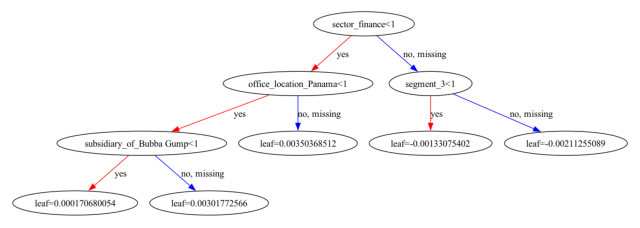

In [ ]:
# Vẽ biểu đồ hình cây
plt.figure(figsize=(20, 10))

# Vẽ biểu đồ hình cây
plot_tree(best_model, num_trees=0, rankdir='TB')

# Lưu biểu đồ vào tệp ảnh
plt.savefig('/Users/hominhtrung/Documents/H4TF/Vòng 2.2/tree_plot_large.png', dpi=300, bbox_inches='tight')

# Hiển thị biểu đồ
plt.show()

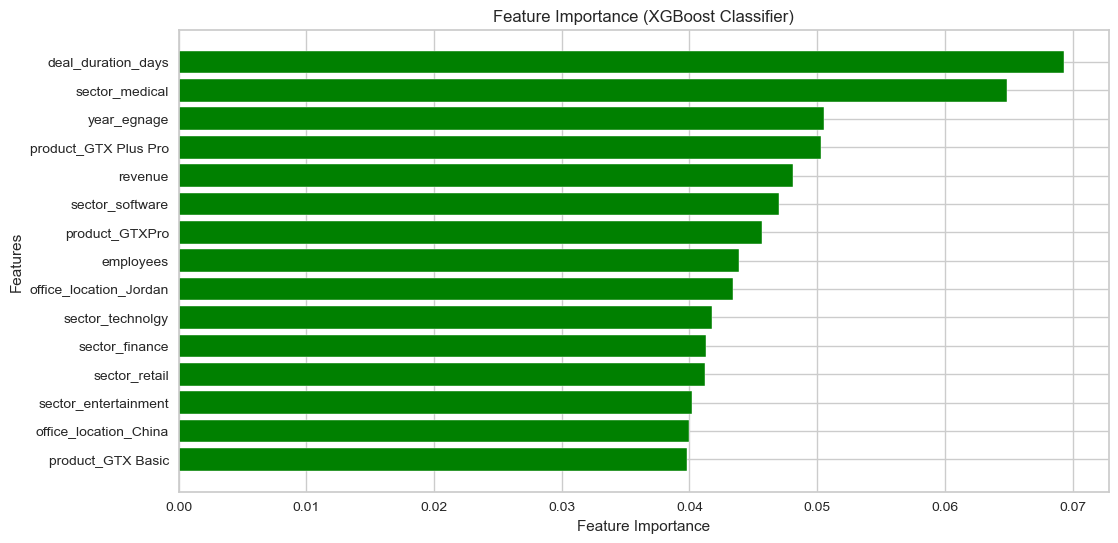

In [ ]:
import numpy as np
plt.figure(figsize=(12, 6))



sorted_idx = np.argsort(best_model.feature_importances_)[-15:]
y = np.array(X.columns)[sorted_idx]
importance = best_model.feature_importances_[sorted_idx]


ax = plt.barh(y=y, width=importance, color='green')
plt.title('Feature Importance (XGBoost Classifier)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')


# for i in ax:
#     plt.text(i.get_width() + 0.01, i.get_y() + i.get_height() / 2,
#              f'{i.get_width():.4f}', ha='left', va='center')

# Hiển thị biểu đồ
plt.show()